### DataSet

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("no_umumi_odenis.csv")

In [ ]:
df

,Unnamed: 0,asılı_olanlar,Birdən_çox_xətt,İnternet_Xidməti,Onlayn_Təhlükəsizlik,Online_Yedekleme,Cihazın_Mühafizəsi,Texniki_Dəstək,canliTV,filmçi,Müqavilə,Kağızsız_faktura,Ödəniş_metodu,cins,tərəfdaş,yaşlı_qrup,İş_müddəti,Aylıq_ödənişlər,Churn
0,0,1.0,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,0.0,0.333333,0.5,0.5,0.0,0.0,0.115423,1
1,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,0.385075,1
2,2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.5,0.0,1.000000,1.0,1.0,0.0,0.0,0.354229,0
3,3,1.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,0.0,1.0,0.239303,1
4,4,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.0,0.521891,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,0.5,0.0,0.0,0.662189,1
7039,7039,0.0,0.0,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.666667,0.5,0.5,0.0,1.0,0.845274,1
7040,7040,0.0,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.333333,0.5,0.5,0.0,0.0,0.112935,1
7041,7041,1.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.000000,1.0,0.5,1.0,0.0,0.558706,0


In [ ]:
df.describe()

,asılı_olanlar,Birdən_çox_xətt,İnternet_Xidməti,Onlayn_Təhlükəsizlik,Online_Yedekleme,Cihazın_Mühafizəsi,Texniki_Dəstək,canliTV,filmçi,Müqavilə,Kağızsız_faktura,Ödəniş_metodu,cins,tərəfdaş,yaşlı_qrup,İş_müddəti,Aylıq_ödənişlər,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.700412,0.529746,0.436462,0.604998,0.546784,0.547778,0.601448,0.507312,0.503763,0.484240,0.407781,0.484879,0.741942,0.747906,0.162147,0.493256,0.462803,0.734630
std,0.458110,0.474277,0.368898,0.429924,0.440081,0.439974,0.430775,0.442501,0.442545,0.334992,0.491457,0.356575,0.263712,0.263827,0.368612,0.499990,0.299403,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.333333,0.500000,0.500000,0.000000,0.000000,0.171642,0.000000
50%,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.333333,0.500000,1.000000,0.000000,0.000000,0.518408,1.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,1.000000,1.000000,0.000000,1.000000,0.712438,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   asılı_olanlar         7043 non-null   float64
 1   Birdən_çox_xətt       7043 non-null   float64
 2   İnternet_Xidməti      7043 non-null   float64
 3   Onlayn_Təhlükəsizlik  7043 non-null   float64
 4   Online_Yedekleme      7043 non-null   float64
 5   Cihazın_Mühafizəsi    7043 non-null   float64
 6   Texniki_Dəstək        7043 non-null   float64
 7   canliTV               7043 non-null   float64
 8   filmçi                7043 non-null   float64
 9   Müqavilə              7043 non-null   float64
 10  Kağızsız_faktura      7043 non-null   float64
 11  Ödəniş_metodu         7043 non-null   float64
 12  cins                  7043 non-null   float64
 13  tərəfdaş              7043 non-null   float64
 14  yaşlı_qrup            7043 non-null   float64
 15  İş_müddəti           

### Dtree RandomizedSearchCV

In [ ]:
rand_best_param = {
                   'min_samples_split': 8,
                   'min_samples_leaf': 14,
                   'max_features': None,
                   'max_depth': 14,
                   'criterion': 'gini'
}

In [ ]:
sm = SMOTE(random_state=42,k_neighbors=28)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8278, 17)
(2070, 17)
(8278,)
(2070,)


In [ ]:
dtreeRS = DecisionTreeClassifier(**rand_best_param, random_state=42)

In [ ]:
%%time
dtreeRS.fit(X_train, y_train)

CPU times: total: 188 ms
Wall time: 327 ms


DecisionTreeClassifier(max_depth=14, min_samples_leaf=14, min_samples_split=8,
                       random_state=42)

In [ ]:
y_pred = dtreeRS.predict(X_test)
y_train_pred = dtreeRS.predict(X_train)
y_pred_proba = dtreeRS.predict_proba(X_test)
y_pred_proba

array([[0.7375    , 0.2625    ],
       [0.27777778, 0.72222222],
       [0.        , 1.        ],
       ...,
       [0.88157895, 0.11842105],
       [0.69230769, 0.30769231],
       [1.        , 0.        ]])

In [ ]:
print("Train accuracy score: ",round(accuracy_score(y_train, y_train_pred),2))
print("Test accuracy score: ",round(accuracy_score(y_test, y_pred),2))
print("\n")
print("Classification Report: \n",classification_report(y_test, y_pred))

Train accuracy score:  0.84
Test accuracy score:  0.82


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1049
           1       0.81      0.82      0.82      1021

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [ ]:
print("Confusion Matrix: \n" ,confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[853 196]
 [182 839]]


ROC AUC: 0.91


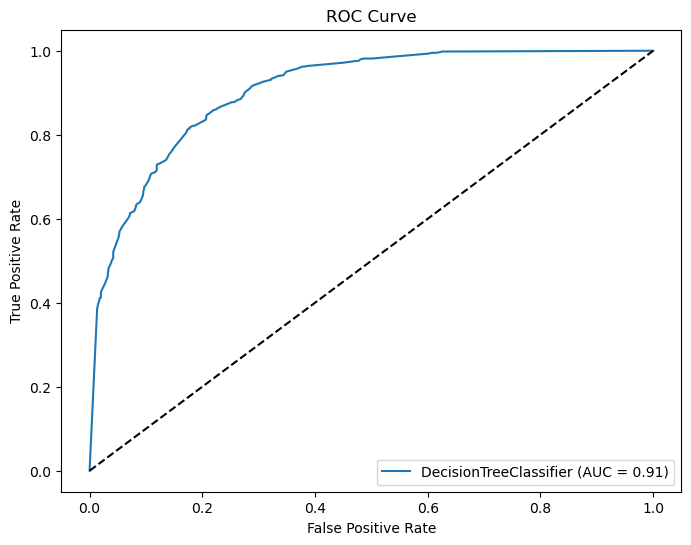

In [ ]:
y_pred_prob = dtreeRS.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'DecisionTreeClassifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### RandomForest

In [ ]:
df2 = df.copy()

In [ ]:
X = df2.drop(["Churn"], axis=1)
y = df2.Churn

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=21)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8278, 17)
(2070, 17)
(8278,)
(2070,)


In [ ]:
RfCl = RandomForestClassifier(
                                n_estimators=200,
                                max_depth=15,
                                min_samples_split=5,
                                min_samples_leaf=3,
                                max_features='sqrt',
                                bootstrap=True,
                                random_state=42
)

In [ ]:
%%time
RfCl.fit(X_train, y_train)

CPU times: total: 7.77 s
Wall time: 8.2 s


RandomForestClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
y_pred = RfCl.predict(X_test)
y_train_pred = RfCl.predict(X_train)

In [ ]:
y_pred_proba = RfCl.predict_proba(X_test)
y_pred_proba

array([[0.97717483, 0.02282517],
       [0.29803482, 0.70196518],
       [0.23198147, 0.76801853],
       ...,
       [0.88679615, 0.11320385],
       [0.73399052, 0.26600948],
       [0.95901318, 0.04098682]])

In [ ]:
print("Train accuracy score: ",round(accuracy_score(y_train, y_train_pred),4))
print("Test accuracy score: ",round(accuracy_score(y_test, y_pred),4))
print("\n")
print("Classification Report: \n",classification_report(y_test, y_pred))

Train accuracy score:  0.898
Test accuracy score:  0.8507


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1049
           1       0.85      0.85      0.85      1021

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [ ]:
print("Confusion Matrix: \n" ,confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[894 155]
 [154 867]]


ROC AUC: 0.93


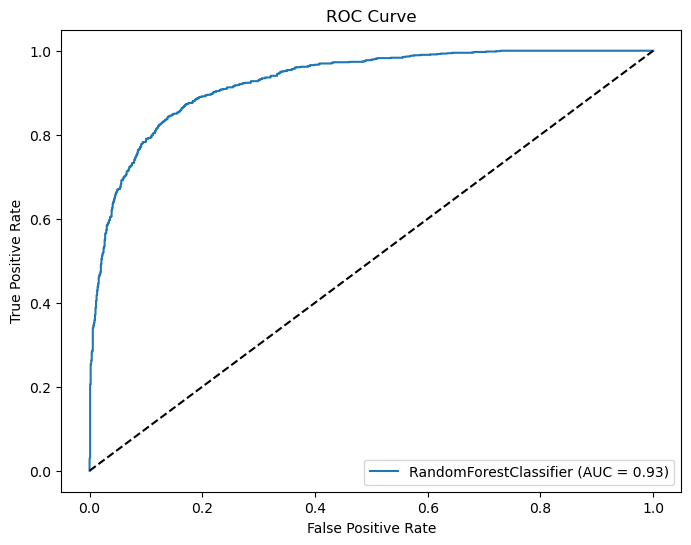

In [ ]:
y_pred_prob = RfCl.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RandomForestClassifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

###  RandomForestClassifier GridSearchCV

In [ ]:
best_param_grd_rf = {'bootstrap': True,
                     'max_depth': 20,
                     'max_features': 'sqrt',
                     'min_samples_leaf': 1,
                     'min_samples_split': 10,
                     'n_estimators': 500}

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=22)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8278, 17)
(2070, 17)
(8278,)
(2070,)


In [ ]:
rf = RandomForestClassifier(**best_param_grd_rf, random_state=42)

In [ ]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 21.4 s
Wall time: 24.5 s


RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=500,
                       random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_test)
y_pred_proba

array([[0.64833108, 0.35166892],
       [0.38336035, 0.61663965],
       [0.16285078, 0.83714922],
       ...,
       [0.93867012, 0.06132988],
       [0.71046965, 0.28953035],
       [0.60082176, 0.39917824]])

In [ ]:
print("Train accuracy score: ",round(accuracy_score(y_train, y_train_pred),2))
print("Test accuracy score: ",round(accuracy_score(y_test, y_pred),2))
print("\n")
print("Classification Report: \n",classification_report(y_test, y_pred))

Train accuracy score:  0.91
Test accuracy score:  0.86


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1049
           1       0.85      0.87      0.86      1021

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [ ]:
print("Confusion Matrix: \n" ,confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[887 162]
 [135 886]]


ROC AUC: 0.93


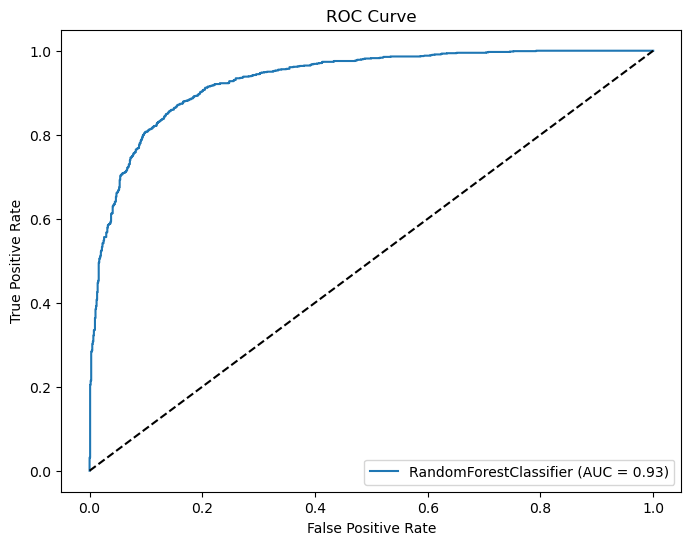

In [ ]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RandomForestClassifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost hyperparam GridSearchCV

In [ ]:
b_param_grid_s_xgbt = {'colsample_bytree': 0.7,
                       'gamma': 0.2,
                       'learning_rate': 0.1,
                       'max_depth': 7,
                       'n_estimators': 100,
                       'reg_alpha': 0.01,
                       'reg_lambda': 0.1,
                       'subsample': 0.7
                      }

In [ ]:
sm = SMOTE(random_state=42,  k_neighbors=13)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8278, 17)
(2070, 17)
(8278,)
(2070,)


In [ ]:
xgb_hp_gs = XGBClassifier(**b_param_grid_s_xgbt, use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
%%time
xgb_hp_gs.fit(X_train, y_train)

C:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:24:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: total: 2.38 s
Wall time: 1.31 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_hp_gs.predict(X_test)
y_train_pred = xgb_hp_gs.predict(X_train)
y_pred_proba = xgb_hp_gs.predict_proba(X_test)
y_pred_proba

array([[0.9877331 , 0.01226688],
       [0.35891145, 0.64108855],
       [0.16407913, 0.8359209 ],
       ...,
       [0.83357966, 0.16642037],
       [0.6819593 , 0.31804076],
       [0.97896504, 0.02103493]], dtype=float32)

In [ ]:
print("Train accuracy score: ",round(accuracy_score(y_train, y_train_pred),2))
print("Test accuracy score: ",round(accuracy_score(y_test, y_pred),2))
print("\n")
print("Classification Report: \n",classification_report(y_test, y_pred))

Train accuracy score:  0.9
Test accuracy score:  0.87


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1049
           1       0.86      0.87      0.86      1021

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



In [ ]:
print("Confusion Matrix: \n" ,confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[900 149]
 [130 891]]


ROC AUC: 0.94


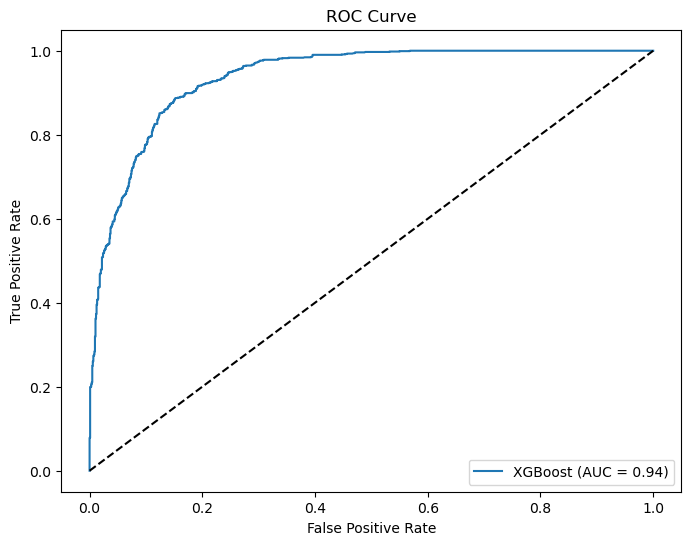

In [ ]:
y_pred_prob = xgb_hp_gs.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### LGBM

In [ ]:
df5 = df.copy()

In [ ]:
X = df5.drop(["Churn"], axis=1)
y = df5.Churn

In [ ]:
sm = SMOTE(random_state=42,k_neighbors=23)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8278, 17)
(2070, 17)
(8278,)
(2070,)


In [ ]:
# Verbose parametri ilə təsnifat səviyyəsində modelin tərifi
lgbmCl = LGBMClassifier(
    is_unbalance=True,
    reg_alpha=0.1,
    reg_lambda=0.1,
    min_split_gain=0.01,
    max_depth=6,
    num_leaves=31,
    min_child_samples=20,
    learning_rate=0.05,
    n_estimators=200,
    feature_fraction=0.8,
    subsample=0.8,
    subsample_freq=5,
    early_stopping_rounds=10,
    verbose=10
)

In [ ]:
%%time
# validation ilə model təlimi
lgbmCl.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],  # validation üçün məlumat dəsti
    eval_metric='binary_logloss'    # Qiymətləndirmə metrikası
)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 4153, number of negative: 4125
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.726947
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.333194
[LightGBM] [Debug] init for col-wise cost 0.002947 seconds, init for row-wise cost 0.010229 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2431
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 17
[Lig

LGBMClassifier(early_stopping_rounds=10, feature_fraction=0.8,
               is_unbalance=True, learning_rate=0.05, max_depth=6,
               min_split_gain=0.01, n_estimators=200, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8, subsample_freq=5, verbose=10)

In [ ]:
lgbmCl_pred = lgbmCl.predict(X_test)
lgbmCl_train_pred = lgbmCl.predict(X_train)
lgbmCl_pred_proba = lgbmCl.predict_proba(X_test)
lgbmCl_pred_proba

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


array([[0.98570284, 0.01429716],
       [0.33100324, 0.66899676],
       [0.29909846, 0.70090154],
       ...,
       [0.80516269, 0.19483731],
       [0.63581688, 0.36418312],
       [0.86910621, 0.13089379]])

In [ ]:
print("Train accuracy score: ",round(accuracy_score(y_train, lgbmCl_train_pred),2))
print("Test accuracy score: ",round(accuracy_score(y_test, lgbmCl_pred),2))
print("\n")
print("Classification Report: \n",classification_report(y_test, lgbmCl_pred))

Train accuracy score:  0.88
Test accuracy score:  0.86


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1049
           1       0.85      0.87      0.86      1021

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [ ]:
print("Confusion Matrix: \n" ,confusion_matrix(y_test, lgbmCl_pred))

Confusion Matrix: 
 [[898 151]
 [133 888]]


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
ROC AUC: 0.94


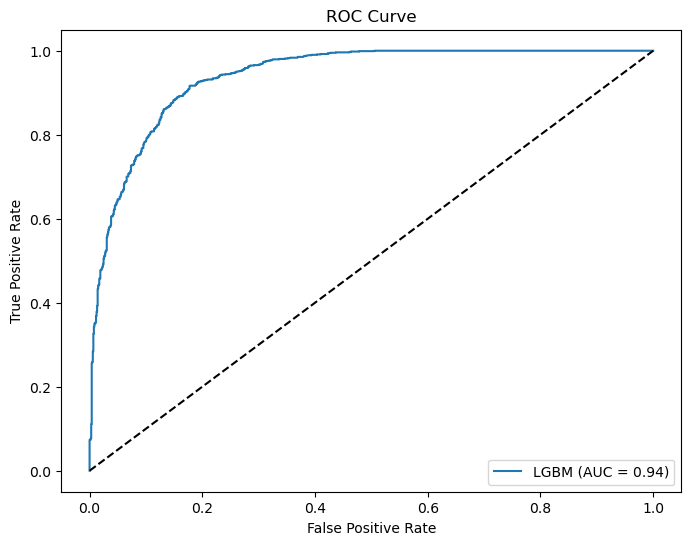

In [ ]:
y_pred_prob = lgbmCl.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LGBM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### SVC

In [ ]:
df7 = df.copy()

In [ ]:
X = df7.drop(["Churn"], axis=1)
y = df7.Churn

In [ ]:
sm = SMOTE(random_state=42,k_neighbors=22)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8278, 17)
(2070, 17)
(8278,)
(2070,)


In [ ]:
svc_model = SVC(
    C=1.0,                     # Tənzimləmə parametri (dəyərin azaldılması yenidən öyrənmənin qarşısını almağa kömək edir)
    kernel='rbf',           # Radial baza funksiyasından istifadə
    gamma='scale',             # Kernel seçimi
    class_weight='balanced',   # Balanssız məlumatlarla işləmək üçün sinif tərəzilərinin avtomatik tənzimlənməsi
    probability=True,          # Ehtimal proqnozları
    random_state=42            # Reproduksiya üçün təsadüfi ədədlərin yaranmasının fiksasiyası
)

In [ ]:
%%time
svc_model.fit(X_train, y_train)

CPU times: total: 1min 26s
Wall time: 1min 36s


SVC(class_weight='balanced', probability=True, random_state=42)

In [ ]:
y_pred = svc_model.predict(X_test)
y_train_pred = svc_model.predict(X_train)
y_pred_proba = svc_model.predict_proba(X_test)
y_pred_proba

array([[0.16344287, 0.83655713],
       [0.21489343, 0.78510657],
       [0.15655411, 0.84344589],
       ...,
       [0.84679939, 0.15320061],
       [0.80262264, 0.19737736],
       [0.7649126 , 0.2350874 ]])

In [ ]:
print("Train accuracy score: ",round(accuracy_score(y_train, y_train_pred),2))
print("Test accuracy score: ",round(accuracy_score(y_test, y_pred),2))
print("\n")
print("Classification Report: \n",classification_report(y_test, y_pred))

Train accuracy score:  0.83
Test accuracy score:  0.82


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1049
           1       0.82      0.81      0.82      1021

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [ ]:
print("Confusion Matrix: \n" ,confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[873 176]
 [196 825]]


ROC AUC: 0.90


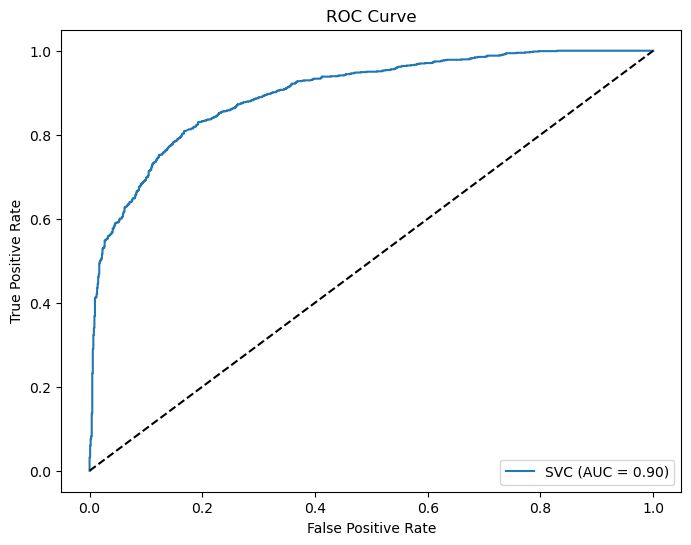

In [ ]:
y_pred_prob = svc_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()